In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'

In [2]:
online = pd.read_csv("Online Dataset.csv")

In [3]:
experience = pd.read_csv("ExperienceReplay.csv")

In [4]:
experience

,Unnamed: 0,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
0,940,9,2,13,10,1,13,10,True
1,1122,9,13,14,10,0,5,-1,False
2,1704,8,12,7,2,0,4,-1,False
3,1809,9,13,0,2,0,5,-1,False
4,1869,5,9,1,0,0,1,10,True
...,...,...,...,...,...,...,...,...,...
42581,73026,10,14,13,7,0,6,-1,False
42582,73027,6,14,13,7,0,2,-1,False
42583,73028,2,14,13,7,2,1,-1,False
42584,73029,1,14,13,7,2,0,-1,False


In [5]:
online.drop('Unnamed: 0', axis=1, inplace=True)
online

,Epochs,Current_State,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,Q_Max,Q1_Current,Q2_Current,Q3_Current,Q4_Current,Q1_Next,Q2_Next,Q3_Next,Q4_Next,Q_Next_Max,Y
0,0,3,7,5,10,0,-1,3,0,0.025504,0.025504,-0.028808,-0.059688,-0.096797,0.025507,-0.029397,-0.058876,-0.096399,0.025507,-0.977044
1,0,3,7,5,10,0,-1,3,0,0.025507,0.025507,-0.029397,-0.058876,-0.096399,0.025311,-0.029186,-0.058975,-0.096921,0.025311,-0.977221
2,0,3,7,5,10,0,-1,3,0,0.025311,0.025311,-0.029186,-0.058975,-0.096921,0.025259,-0.029254,-0.059084,-0.096570,0.025259,-0.977267
3,0,3,7,5,10,0,-1,3,0,0.025259,0.025259,-0.029254,-0.059084,-0.096570,0.025271,-0.029088,-0.059040,-0.097146,0.025271,-0.977256
4,0,3,7,5,10,0,-1,3,0,0.025271,0.025271,-0.029088,-0.059040,-0.097146,0.025396,-0.029485,-0.058923,-0.096761,0.025396,-0.977144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,4998,6,3,1,8,2,-1,5,0,7.985765,6.543100,5.417122,7.985765,3.816025,9.737021,5.751934,6.621516,6.852162,9.737021,7.763319
34656,4998,5,3,1,8,0,10,1,0,9.757797,9.757797,5.713107,6.605927,6.872090,8.405054,8.555333,9.564618,9.528024,9.564618,10.000000
34657,4999,10,8,3,14,0,-1,6,0,6.479850,6.479850,2.173633,3.403223,4.824383,8.252207,4.815167,5.064015,8.466753,8.466753,6.620078
34658,4999,6,8,3,14,3,-1,7,0,8.470242,8.273722,4.820699,5.066678,8.470242,10.759487,5.722989,5.832384,7.741495,10.759487,8.683538


In [6]:
experience.drop('Unnamed: 0', axis=1, inplace=True)
experience

,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
0,9,2,13,10,1,13,10,True
1,9,13,14,10,0,5,-1,False
2,8,12,7,2,0,4,-1,False
3,9,13,0,2,0,5,-1,False
4,5,9,1,0,0,1,10,True
...,...,...,...,...,...,...,...,...
42581,10,14,13,7,0,6,-1,False
42582,6,14,13,7,0,2,-1,False
42583,2,14,13,7,2,1,-1,False
42584,1,14,13,7,2,0,-1,False


In [81]:
pc = online[online["Epsilon_Boolean"] == 0]
pc

,Epochs,Current_State,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,Q_Max,Q1_Current,Q2_Current,Q3_Current,Q4_Current,Q1_Next,Q2_Next,Q3_Next,Q4_Next,Q_Next_Max,Y
0,0,3,7,5,10,0,-1,3,0,0.025504,0.025504,-0.028808,-0.059688,-0.096797,0.025507,-0.029397,-0.058876,-0.096399,0.025507,-0.977044
1,0,3,7,5,10,0,-1,3,0,0.025507,0.025507,-0.029397,-0.058876,-0.096399,0.025311,-0.029186,-0.058975,-0.096921,0.025311,-0.977221
2,0,3,7,5,10,0,-1,3,0,0.025311,0.025311,-0.029186,-0.058975,-0.096921,0.025259,-0.029254,-0.059084,-0.096570,0.025259,-0.977267
3,0,3,7,5,10,0,-1,3,0,0.025259,0.025259,-0.029254,-0.059084,-0.096570,0.025271,-0.029088,-0.059040,-0.097146,0.025271,-0.977256
4,0,3,7,5,10,0,-1,3,0,0.025271,0.025271,-0.029088,-0.059040,-0.097146,0.025396,-0.029485,-0.058923,-0.096761,0.025396,-0.977144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,4998,6,3,1,8,2,-1,5,0,7.985765,6.543100,5.417122,7.985765,3.816025,9.737021,5.751934,6.621516,6.852162,9.737021,7.763319
34656,4998,5,3,1,8,0,10,1,0,9.757797,9.757797,5.713107,6.605927,6.872090,8.405054,8.555333,9.564618,9.528024,9.564618,10.000000
34657,4999,10,8,3,14,0,-1,6,0,6.479850,6.479850,2.173633,3.403223,4.824383,8.252207,4.815167,5.064015,8.466753,8.466753,6.620078
34658,4999,6,8,3,14,3,-1,7,0,8.470242,8.273722,4.820699,5.066678,8.470242,10.759487,5.722989,5.832384,7.741495,10.759487,8.683538


In [193]:
pf = pc.drop_duplicates(keep='last',subset=[ 'Pit_Position', 'Goal_Position', 'Wall_Position', 'Next_State'])
pf

,Epochs,Current_State,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,Q_Max,Q1_Current,Q2_Current,Q3_Current,Q4_Current,Q1_Next,Q2_Next,Q3_Next,Q4_Next,Q_Next_Max,Y
5,0,3,7,5,10,0,-1,3,0,0.025396,0.025396,-0.029485,-0.058923,-0.096761,0.025433,-0.029291,-0.059166,-0.096790,0.025433,-0.977111
8,1,10,12,2,4,0,-1,6,0,0.041147,0.041147,-0.075588,-0.058081,-0.120215,0.053155,-0.063511,-0.066093,-0.122014,0.053155,-0.952160
9,1,6,12,2,4,0,10,2,0,0.053155,0.053155,-0.063511,-0.066093,-0.122014,0.066674,-0.061187,-0.085927,-0.121138,0.066674,10.000000
10,2,9,6,7,10,0,-1,5,0,0.066137,0.066137,-0.046963,-0.071353,-0.112664,0.062354,-0.038628,-0.084461,-0.111109,0.062354,-0.943882
73,3,0,2,4,5,0,-1,0,0,0.019866,0.019866,-0.060568,-0.065518,-0.109408,0.019620,-0.060740,-0.065518,-0.109271,0.019620,-0.982342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,4998,6,3,1,8,2,-1,5,0,7.985765,6.543100,5.417122,7.985765,3.816025,9.737021,5.751934,6.621516,6.852162,9.737021,7.763319
34656,4998,5,3,1,8,0,10,1,0,9.757797,9.757797,5.713107,6.605927,6.872090,8.405054,8.555333,9.564618,9.528024,9.564618,10.000000
34657,4999,10,8,3,14,0,-1,6,0,6.479850,6.479850,2.173633,3.403223,4.824383,8.252207,4.815167,5.064015,8.466753,8.466753,6.620078
34658,4999,6,8,3,14,3,-1,7,0,8.470242,8.273722,4.820699,5.066678,8.470242,10.759487,5.722989,5.832384,7.741495,10.759487,8.683538


In [99]:
address = pf["Current_State"]
  
# Using 'Address' as the column name
# and equating it to the list
pf['Quadrant'] = address

C:\Users\kuany\AppData\Local\Temp\ipykernel_18772\2395414824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf['Quadrant'] = address


In [100]:
pf

,Epochs,Current_State,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,Q_Max,...,Q2_Current,Q3_Current,Q4_Current,Q1_Next,Q2_Next,Q3_Next,Q4_Next,Q_Next_Max,Y,Quadrant
5,0,3,7,5,10,0,-1,3,0,0.025396,...,-0.029485,-0.058923,-0.096761,0.025433,-0.029291,-0.059166,-0.096790,0.025433,-0.977111,3
8,1,10,12,2,4,0,-1,6,0,0.041147,...,-0.075588,-0.058081,-0.120215,0.053155,-0.063511,-0.066093,-0.122014,0.053155,-0.952160,10
9,1,6,12,2,4,0,10,2,0,0.053155,...,-0.063511,-0.066093,-0.122014,0.066674,-0.061187,-0.085927,-0.121138,0.066674,10.000000,6
10,2,9,6,7,10,0,-1,5,0,0.066137,...,-0.046963,-0.071353,-0.112664,0.062354,-0.038628,-0.084461,-0.111109,0.062354,-0.943882,9
73,3,0,2,4,5,0,-1,0,0,0.019866,...,-0.060568,-0.065518,-0.109408,0.019620,-0.060740,-0.065518,-0.109271,0.019620,-0.982342,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,4998,6,3,1,8,2,-1,5,0,7.985765,...,5.417122,7.985765,3.816025,9.737021,5.751934,6.621516,6.852162,9.737021,7.763319,6
34656,4998,5,3,1,8,0,10,1,0,9.757797,...,5.713107,6.605927,6.872090,8.405054,8.555333,9.564618,9.528024,9.564618,10.000000,5
34657,4999,10,8,3,14,0,-1,6,0,6.479850,...,2.173633,3.403223,4.824383,8.252207,4.815167,5.064015,8.466753,8.466753,6.620078,10
34658,4999,6,8,3,14,3,-1,7,0,8.470242,...,4.820699,5.066678,8.470242,10.759487,5.722989,5.832384,7.741495,10.759487,8.683538,6


In [101]:
pf = pf.reindex(["Epochs","Current_State","Quadrant", "Pit_Position", "Goal_Position", "Wall_Position", "Action",  "Reward", "Next_State", "Epsilon_Boolean", 
                "Q_Max", "Q1_Current", "Q2_Current", "Q3_Current", "Q4_Current", "Q1_Next", "Q2_Next", "Q3_Next", "Q4_Next","Q_Next_Max", "Y"
                ], axis=1)

In [102]:
pf

,Epochs,Current_State,Quadrant,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Q1_Current,Q2_Current,Q3_Current,Q4_Current,Q1_Next,Q2_Next,Q3_Next,Q4_Next,Q_Next_Max,Y
5,0,3,3,7,5,10,0,-1,3,0,...,0.025396,-0.029485,-0.058923,-0.096761,0.025433,-0.029291,-0.059166,-0.096790,0.025433,-0.977111
8,1,10,10,12,2,4,0,-1,6,0,...,0.041147,-0.075588,-0.058081,-0.120215,0.053155,-0.063511,-0.066093,-0.122014,0.053155,-0.952160
9,1,6,6,12,2,4,0,10,2,0,...,0.053155,-0.063511,-0.066093,-0.122014,0.066674,-0.061187,-0.085927,-0.121138,0.066674,10.000000
10,2,9,9,6,7,10,0,-1,5,0,...,0.066137,-0.046963,-0.071353,-0.112664,0.062354,-0.038628,-0.084461,-0.111109,0.062354,-0.943882
73,3,0,0,2,4,5,0,-1,0,0,...,0.019866,-0.060568,-0.065518,-0.109408,0.019620,-0.060740,-0.065518,-0.109271,0.019620,-0.982342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,4998,6,6,3,1,8,2,-1,5,0,...,6.543100,5.417122,7.985765,3.816025,9.737021,5.751934,6.621516,6.852162,9.737021,7.763319
34656,4998,5,5,3,1,8,0,10,1,0,...,9.757797,5.713107,6.605927,6.872090,8.405054,8.555333,9.564618,9.528024,9.564618,10.000000
34657,4999,10,10,8,3,14,0,-1,6,0,...,6.479850,2.173633,3.403223,4.824383,8.252207,4.815167,5.064015,8.466753,8.466753,6.620078
34658,4999,6,6,8,3,14,3,-1,7,0,...,8.273722,4.820699,5.066678,8.470242,10.759487,5.722989,5.832384,7.741495,10.759487,8.683538


In [107]:
pf.loc[pf.Quadrant == 0, 'Quadrant'] = 0
pf.loc[pf.Quadrant == 1, 'Quadrant'] = 0
pf.loc[pf.Quadrant == 2, 'Quadrant'] = 1
pf.loc[pf.Quadrant == 3, 'Quadrant'] = 1
pf.loc[pf.Quadrant == 4, 'Quadrant'] = 0
pf.loc[pf.Quadrant == 5, 'Quadrant'] = 0
pf.loc[pf.Quadrant == 6, 'Quadrant'] = 1
pf.loc[pf.Quadrant == 7, 'Quadrant'] = 1
pf.loc[pf.Quadrant == 8, 'Quadrant'] = 2
pf.loc[pf.Quadrant == 9, 'Quadrant'] = 2
pf.loc[pf.Quadrant == 10, 'Quadrant'] = 3
pf.loc[pf.Quadrant == 11, 'Quadrant'] = 3
pf.loc[pf.Quadrant == 12, 'Quadrant'] = 2
pf.loc[pf.Quadrant == 13, 'Quadrant'] = 2
pf.loc[pf.Quadrant == 14, 'Quadrant'] = 3
pf.loc[pf.Quadrant == 15, 'Quadrant'] = 3

In [108]:
pf

,Epochs,Current_State,Quadrant,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Q1_Current,Q2_Current,Q3_Current,Q4_Current,Q1_Next,Q2_Next,Q3_Next,Q4_Next,Q_Next_Max,Y
5,0,3,1,7,5,10,0,-1,3,0,...,0.025396,-0.029485,-0.058923,-0.096761,0.025433,-0.029291,-0.059166,-0.096790,0.025433,-0.977111
8,1,10,3,12,2,4,0,-1,6,0,...,0.041147,-0.075588,-0.058081,-0.120215,0.053155,-0.063511,-0.066093,-0.122014,0.053155,-0.952160
9,1,6,1,12,2,4,0,10,2,0,...,0.053155,-0.063511,-0.066093,-0.122014,0.066674,-0.061187,-0.085927,-0.121138,0.066674,10.000000
10,2,9,2,6,7,10,0,-1,5,0,...,0.066137,-0.046963,-0.071353,-0.112664,0.062354,-0.038628,-0.084461,-0.111109,0.062354,-0.943882
73,3,0,0,2,4,5,0,-1,0,0,...,0.019866,-0.060568,-0.065518,-0.109408,0.019620,-0.060740,-0.065518,-0.109271,0.019620,-0.982342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,4998,6,1,3,1,8,2,-1,5,0,...,6.543100,5.417122,7.985765,3.816025,9.737021,5.751934,6.621516,6.852162,9.737021,7.763319
34656,4998,5,0,3,1,8,0,10,1,0,...,9.757797,5.713107,6.605927,6.872090,8.405054,8.555333,9.564618,9.528024,9.564618,10.000000
34657,4999,10,3,8,3,14,0,-1,6,0,...,6.479850,2.173633,3.403223,4.824383,8.252207,4.815167,5.064015,8.466753,8.466753,6.620078
34658,4999,6,1,8,3,14,3,-1,7,0,...,8.273722,4.820699,5.066678,8.470242,10.759487,5.722989,5.832384,7.741495,10.759487,8.683538


In [112]:
q0 = pf[pf['Quadrant'] == 0]
q1 = pf[pf['Quadrant'] == 1]
q2 = pf[pf['Quadrant'] == 2]
q3 = pf[pf['Quadrant'] == 3]

In [109]:
pf.to_csv('Dataset_Quadrants.csv')

In [134]:
X = q3[['Current_State','Pit_Position', 'Goal_Position', 'Wall_Position']].values
y = q3[['Q_Max']].values

In [83]:
X = pf[['Current_State','Pit_Position', 'Goal_Position', 'Wall_Position']].values
y = pf[['Q_Max']].values

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [136]:
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = reg3.predict(X_test)

In [137]:
def calculate_smape(actual, predicted) -> float:
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [138]:
calculate_smape(y_test, y_pred)

44.84

In [159]:
X = q3[['Current_State','Pit_Position', 'Goal_Position', 'Wall_Position', 'Reward']].values
y = q3[['Y']].values

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [161]:
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = reg3.predict(X_test)

In [162]:
def calculate_smape(actual, predicted) -> float:
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [163]:
calculate_smape(y_test, y_pred)

49.54

In [164]:
reg3.coef_

array([[-0.27365432,  0.0127212 ,  0.08672809, -0.01807556,  0.48756795]])

In [165]:
reg3.intercept_

array([7.5381335])

In [150]:
reg1.coef_

array([[ 0.15392594,  0.06040577, -0.13158231,  0.03003067,  0.48255004]])

In [151]:
reg1.intercept_

array([4.52728295])

In [142]:
reg0.coef_

array([[-0.30696797,  0.00182807,  0.25797256, -0.04692829]])

In [144]:
reg0.intercept_

array([7.82871586])

In [23]:
pf.groupby(['Action'])['Action'].count().sort_values(ascending=False) 

Action
0    2592
2    2572
3    2526
1    2473
Name: Action, dtype: int64

In [24]:
pf.groupby(['Action','Reward'])['Action'].count().sort_values(ascending=False) 

Action  Reward
0       -1        2023
2       -1        1995
3       -1        1908
1       -1        1852
         10        592
3        10        585
2        10        541
0        10        538
2       -10         36
3       -10         33
0       -10         31
1       -10         29
Name: Action, dtype: int64

In [33]:
pf.groupby(['Goal_Position'])['Action'].count().sort_values(ascending=False) 

Goal_Position
3     797
12    769
15    748
0     699
7     677
1     659
8     651
4     649
2     637
14    634
13    619
11    599
5     537
9     534
6     499
10    455
Name: Action, dtype: int64

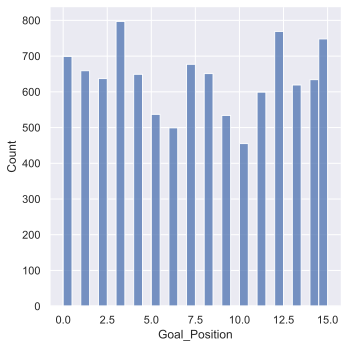

In [34]:
sns.displot(pf, x="Goal_Position", binwidth=0.5)


In [38]:
pf['Goal_Position'] = pf['Goal_Position'].replace(['0'], '0')
pf['Goal_Position'] = pf['Goal_Position'].replace(['1'], '0')
pf['Goal_Position'] = pf['Goal_Position'].replace(['2'], '1')
pf['Goal_Position'] = pf['Goal_Position'].replace(['3'], '1')
pf['Goal_Position'] = pf['Goal_Position'].replace(['4'], '0')
pf['Goal_Position'] = pf['Goal_Position'].replace(['5'], '0')
pf['Goal_Position'] = pf['Goal_Position'].replace(['6'], '1')
pf['Goal_Position'] = pf['Goal_Position'].replace(['7'], '1')
pf['Goal_Position'] = pf['Goal_Position'].replace(['8'], '2')
pf['Goal_Position'] = pf['Goal_Position'].replace(['9'], '2')
pf['Goal_Position'] = pf['Goal_Position'].replace(['10'], '3')
pf['Goal_Position'] = pf['Goal_Position'].replace(['11'], '3')
pf['Goal_Position'] = pf['Goal_Position'].replace(['12'], '2')
pf['Goal_Position'] = pf['Goal_Position'].replace(['13'], '2')
pf['Goal_Position'] = pf['Goal_Position'].replace(['14'], '3')
pf['Goal_Position'] = pf['Goal_Position'].replace(['15'], '3')

C:\Users\kuany\AppData\Local\Temp\ipykernel_18772\3464275637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf['Goal_Position'] = pf['Goal_Position'].replace(['0'], '0')
C:\Users\kuany\AppData\Local\Temp\ipykernel_18772\3464275637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf['Goal_Position'] = pf['Goal_Position'].replace(['1'], '0')
C:\Users\kuany\AppData\Local\Temp\ipykernel_18772\3464275637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [46]:
pf.loc[pf.Goal_Position == 0, 'Goal_Position'] = 0
pf.loc[pf.Goal_Position == 1, 'Goal_Position'] = 0
pf.loc[pf.Goal_Position == 2, 'Goal_Position'] = 1
pf.loc[pf.Goal_Position == 3, 'Goal_Position'] = 1
pf.loc[pf.Goal_Position == 4, 'Goal_Position'] = 0
pf.loc[pf.Goal_Position == 5, 'Goal_Position'] = 0
pf.loc[pf.Goal_Position == 6, 'Goal_Position'] = 1
pf.loc[pf.Goal_Position == 7, 'Goal_Position'] = 1
pf.loc[pf.Goal_Position == 8, 'Goal_Position'] = 2
pf.loc[pf.Goal_Position == 9, 'Goal_Position'] = 2
pf.loc[pf.Goal_Position == 10, 'Goal_Position'] = 3
pf.loc[pf.Goal_Position == 11, 'Goal_Position'] = 3
pf.loc[pf.Goal_Position == 12, 'Goal_Position'] = 2
pf.loc[pf.Goal_Position == 13, 'Goal_Position'] = 2
pf.loc[pf.Goal_Position == 14, 'Goal_Position'] = 3
pf.loc[pf.Goal_Position == 15, 'Goal_Position'] = 3

In [49]:
pf.groupby(['Goal_Position'])['Goal_Position'].count().sort_values(ascending=False) 

Goal_Position
1    2610
2    2573
0    2544
3    2436
Name: Goal_Position, dtype: int64

In [55]:
pf[["Y"]].describe()

,Y
count,10163.000000
mean,5.597226
std,4.109509
min,-19.946928
25%,3.729228
50%,6.338886
75%,8.684244
max,13.505034


In [166]:
pf

,Epochs,Current_State,Quadrant,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Q1_Current,Q2_Current,Q3_Current,Q4_Current,Q1_Next,Q2_Next,Q3_Next,Q4_Next,Q_Next_Max,Y
5,0,3,1,7,5,10,0,-1,3,0,...,0.025396,-0.029485,-0.058923,-0.096761,0.025433,-0.029291,-0.059166,-0.096790,0.025433,-0.977111
8,1,10,3,12,2,4,0,-1,6,0,...,0.041147,-0.075588,-0.058081,-0.120215,0.053155,-0.063511,-0.066093,-0.122014,0.053155,-0.952160
9,1,6,1,12,2,4,0,10,2,0,...,0.053155,-0.063511,-0.066093,-0.122014,0.066674,-0.061187,-0.085927,-0.121138,0.066674,10.000000
10,2,9,2,6,7,10,0,-1,5,0,...,0.066137,-0.046963,-0.071353,-0.112664,0.062354,-0.038628,-0.084461,-0.111109,0.062354,-0.943882
73,3,0,0,2,4,5,0,-1,0,0,...,0.019866,-0.060568,-0.065518,-0.109408,0.019620,-0.060740,-0.065518,-0.109271,0.019620,-0.982342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,4998,6,1,3,1,8,2,-1,5,0,...,6.543100,5.417122,7.985765,3.816025,9.737021,5.751934,6.621516,6.852162,9.737021,7.763319
34656,4998,5,0,3,1,8,0,10,1,0,...,9.757797,5.713107,6.605927,6.872090,8.405054,8.555333,9.564618,9.528024,9.564618,10.000000
34657,4999,10,3,8,3,14,0,-1,6,0,...,6.479850,2.173633,3.403223,4.824383,8.252207,4.815167,5.064015,8.466753,8.466753,6.620078
34658,4999,6,1,8,3,14,3,-1,7,0,...,8.273722,4.820699,5.066678,8.470242,10.759487,5.722989,5.832384,7.741495,10.759487,8.683538


In [257]:
from sklearn.preprocessing import OneHotEncoder
x = pf[["Current_State"]]
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [184]:
dataset = pd.DataFrame({'Encode_0': y[:, 0], 'Encode_1': y[:, 1], 'Encode_2': y[:, 2], 'Encode_3': y[:, 3], 'Encode_4': y[:, 4], 'Encode_5': y[:, 5], 'Encode_6': y[:, 6], 'Encode_7': y[:, 7], 'Encode_8': y[:, 8], 'Encode_9': y[:, 9], 'Encode_10': y[:, 10], 'Encode_11': y[:, 11], 'Encode_12': y[:, 12], 'Encode_13': y[:, 13], 'Encode_14': y[:, 14], 'Encode_15': y[:, 15]})

In [ ]:
for i in range(0,y):
    pf["Encode0"] 

In [185]:
dataset

,Encode_0,Encode_1,Encode_2,Encode_3,Encode_4,Encode_5,Encode_6,Encode_7,Encode_8,Encode_9,Encode_10,Encode_11,Encode_12,Encode_13,Encode_14,Encode_15
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10159,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10161,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
pf = pf.reset_index()

In [201]:
pf

,index,Epochs,Current_State,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Q2_Current,Q3_Current,Q4_Current,Q1_Next,Q2_Next,Q3_Next,Q4_Next,Q_Next_Max,Y,Encode_0
0,5,0,3,7,5,10,0,-1,3,0,...,-0.029485,-0.058923,-0.096761,0.025433,-0.029291,-0.059166,-0.096790,0.025433,-0.977111,0.0
1,8,1,10,12,2,4,0,-1,6,0,...,-0.075588,-0.058081,-0.120215,0.053155,-0.063511,-0.066093,-0.122014,0.053155,-0.952160,1.0
2,9,1,6,12,2,4,0,10,2,0,...,-0.063511,-0.066093,-0.122014,0.066674,-0.061187,-0.085927,-0.121138,0.066674,10.000000,0.0
3,10,2,9,6,7,10,0,-1,5,0,...,-0.046963,-0.071353,-0.112664,0.062354,-0.038628,-0.084461,-0.111109,0.062354,-0.943882,0.0
4,73,3,0,2,4,5,0,-1,0,0,...,-0.060568,-0.065518,-0.109408,0.019620,-0.060740,-0.065518,-0.109271,0.019620,-0.982342,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,34655,4998,6,3,1,8,2,-1,5,0,...,5.417122,7.985765,3.816025,9.737021,5.751934,6.621516,6.852162,9.737021,7.763319,NaN
10159,34656,4998,5,3,1,8,0,10,1,0,...,5.713107,6.605927,6.872090,8.405054,8.555333,9.564618,9.528024,9.564618,10.000000,NaN
10160,34657,4999,10,8,3,14,0,-1,6,0,...,2.173633,3.403223,4.824383,8.252207,4.815167,5.064015,8.466753,8.466753,6.620078,NaN
10161,34658,4999,6,8,3,14,3,-1,7,0,...,4.820699,5.066678,8.470242,10.759487,5.722989,5.832384,7.741495,10.759487,8.683538,NaN


In [206]:
pf['Encode_0'] = dataset["Encode_0"]
pf['Encode_1'] = dataset["Encode_1"]
pf['Encode_2'] = dataset["Encode_2"]
pf['Encode_3'] = dataset["Encode_3"]
pf['Encode_4'] = dataset["Encode_4"]
pf['Encode_5'] = dataset["Encode_5"]
pf['Encode_6'] = dataset["Encode_6"]
pf['Encode_7'] = dataset["Encode_7"]
pf['Encode_8'] = dataset["Encode_8"]
pf['Encode_9'] = dataset["Encode_9"]
pf['Encode_10'] = dataset["Encode_10"]
pf['Encode_11'] = dataset["Encode_11"]
pf['Encode_12'] = dataset["Encode_12"]
pf['Encode_13'] = dataset["Encode_13"]
pf['Encode_14'] = dataset["Encode_14"]
pf['Encode_15'] = dataset["Encode_15"]
pf

,index,Epochs,Current_State,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Encode_6,Encode_7,Encode_8,Encode_9,Encode_10,Encode_11,Encode_12,Encode_13,Encode_14,Encode_15
0,5,0,3,7,5,10,0,-1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,1,10,12,2,4,0,-1,6,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9,1,6,12,2,4,0,10,2,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,2,9,6,7,10,0,-1,5,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73,3,0,2,4,5,0,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,34655,4998,6,3,1,8,2,-1,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10159,34656,4998,5,3,1,8,0,10,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10160,34657,4999,10,8,3,14,0,-1,6,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10161,34658,4999,6,8,3,14,3,-1,7,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
pf

,index,Epochs,Current_State,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Encode_6,Encode_7,Encode_8,Encode_9,Encode_10,Encode_11,Encode_12,Encode_13,Encode_14,Encode_15
0,5,0,3,7,5,10,0,-1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,1,10,12,2,4,0,-1,6,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9,1,6,12,2,4,0,10,2,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,2,9,6,7,10,0,-1,5,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73,3,0,2,4,5,0,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,34655,4998,6,3,1,8,2,-1,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10159,34656,4998,5,3,1,8,0,10,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10160,34657,4999,10,8,3,14,0,-1,6,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10161,34658,4999,6,8,3,14,3,-1,7,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
result

,Epochs,Current_State,Quadrant,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Encode_6,Encode_7,Encode_8,Encode_9,Encode_10,Encode_11,Encode_12,Encode_13,Encode_14,Encode_15
5,0.0,3.0,1.0,7.0,5.0,10.0,0.0,-1.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,10.0,3.0,12.0,2.0,4.0,0.0,-1.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,6.0,1.0,12.0,2.0,4.0,0.0,10.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2.0,9.0,2.0,6.0,7.0,10.0,0.0,-1.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,3.0,0.0,0.0,2.0,4.0,5.0,0.0,-1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
df3

,Epochs,Current_State,Quadrant,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Encode_6,Encode_7,Encode_8,Encode_9,Encode_10,Encode_11,Encode_12,Encode_13,Encode_14,Encode_15
5,0.0,3.0,1.0,7.0,5.0,10.0,0.0,-1.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,10.0,3.0,12.0,2.0,4.0,0.0,-1.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,6.0,1.0,12.0,2.0,4.0,0.0,10.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2.0,9.0,2.0,6.0,7.0,10.0,0.0,-1.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,3.0,0.0,0.0,2.0,4.0,5.0,0.0,-1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = df[df[""]]
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

In [207]:
pf

,index,Epochs,Current_State,Pit_Position,Goal_Position,Wall_Position,Action,Reward,Next_State,Epsilon_Boolean,...,Encode_6,Encode_7,Encode_8,Encode_9,Encode_10,Encode_11,Encode_12,Encode_13,Encode_14,Encode_15
0,5,0,3,7,5,10,0,-1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,1,10,12,2,4,0,-1,6,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9,1,6,12,2,4,0,10,2,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,2,9,6,7,10,0,-1,5,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73,3,0,2,4,5,0,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,34655,4998,6,3,1,8,2,-1,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10159,34656,4998,5,3,1,8,0,10,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10160,34657,4999,10,8,3,14,0,-1,6,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10161,34658,4999,6,8,3,14,3,-1,7,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [262]:
pf.to_csv('Encoded_Dataset.csv')

In [232]:
X = pf[['Encode_0','Encode_1','Encode_2','Encode_3','Encode_4','Encode_5','Encode_6','Encode_7','Encode_8','Encode_9','Encode_10',
        'Encode_11','Encode_12','Encode_13','Encode_14','Encode_15','Pit_Position', 'Goal_Position', 'Wall_Position', 'Reward']].values
y = pf[['Y']].values

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [234]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor1.predict(X_test)

In [235]:
def calculate_smape(actual, predicted) -> float:
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [236]:
calculate_smape(y_test, y_pred)

49.35

In [237]:
import numpy as np
import random
import sys

def randPair(s,e):
    return np.random.randint(s,e), np.random.randint(s,e)

class BoardPiece:

    def __init__(self, name, code, pos):
        self.name = name #name of the piece
        self.code = code #an ASCII character to display on the board
        self.pos = pos #2-tuple e.g. (1,4)

class BoardMask:

    def __init__(self, name, mask, code):
        self.name = name
        self.mask = mask
        self.code = code

    def get_positions(self): #returns tuple of arrays
        return np.nonzero(self.mask)

def zip_positions2d(positions): #positions is tuple of two arrays
    x,y = positions
    return list(zip(x,y))

class GridBoard:

    def __init__(self, size=4):
        self.size = size #Board dimensions, e.g. 4 x 4
        self.components = {} #name : board piece
        self.masks = {}

    def addPiece(self, name, code, pos=(0,0)):
        newPiece = BoardPiece(name, code, pos)
        self.components[name] = newPiece

    #basically a set of boundary elements
    def addMask(self, name, mask, code):
        #mask is a 2D-numpy array with 1s where the boundary elements are
        newMask = BoardMask(name, mask, code)
        self.masks[name] = newMask

    def movePiece(self, name, pos):
        move = True
        for _, mask in self.masks.items():
            if pos in zip_positions2d(mask.get_positions()):
                move = False
        if move:
            self.components[name].pos = pos

    def delPiece(self, name):
        del self.components['name']

    def render(self):
        dtype = '<U2'
        displ_board = np.zeros((self.size, self.size), dtype=dtype)
        displ_board[:] = ' '

        for name, piece in self.components.items():
            displ_board[piece.pos] = piece.code

        for name, mask in self.masks.items():
            displ_board[mask.get_positions()] = mask.code

        return displ_board

    def render_np(self):
        num_pieces = len(self.components) + len(self.masks)
        displ_board = np.zeros((num_pieces, self.size, self.size), dtype=np.uint8)
        layer = 0
        for name, piece in self.components.items():
            pos = (layer,) + piece.pos
            displ_board[pos] = 1
            layer += 1

        for name, mask in self.masks.items():
            x,y = self.masks['boundary'].get_positions()
            z = np.repeat(layer,len(x))
            a = (z,x,y)
            displ_board[a] = 1
            layer += 1
        return displ_board

def addTuple(a,b):
    return tuple([sum(x) for x in zip(a,b)])

In [433]:
class Gridworld:

    def __init__(self, size=4, mode='static'):
        if size >= 4:
            self.board = GridBoard(size=size)
        else:
            print("Minimum board size is 4. Initialized to size 4.")
            self.board = GridBoard(size=4)

        #Add pieces, positions will be updated later
        self.board.addPiece('Player','P',(0,0))
        self.board.addPiece('Goal','+',(0,3))
        self.board.addPiece('Pit','-',(0,3))
        self.board.addPiece('Wall','W',(2,3))

        if mode == 'static':
            self.initGridStatic()
        elif mode == 'player':
            self.initGridPlayer()
        else:
            self.initGridRand()

    #Initialize stationary grid, all items are placed deterministically
    def initGridStatic(self):
        #Setup static pieces
        self.board.components['Player'].pos = (1,2) #Row, Column
        self.board.components['Goal'].pos = (2,2)
        self.board.components['Pit'].pos = (3,0)
        self.board.components['Wall'].pos = (0,2)

    #Check if board is initialized appropriately (no overlapping pieces)
    #also remove impossible-to-win boards
    def validateBoard(self):
        valid = True

        player = self.board.components['Player']
        goal = self.board.components['Goal']
        wall = self.board.components['Wall']
        pit = self.board.components['Pit']

        all_positions = [piece for name,piece in self.board.components.items()]
        all_positions = [player.pos, goal.pos, wall.pos, pit.pos]
        if len(all_positions) > len(set(all_positions)):
            return False

        corners = [(0,0),(0,self.board.size), (self.board.size,0), (self.board.size,self.board.size)]
        #if player is in corner, can it move? if goal is in corner, is it blocked?
        if player.pos in corners or goal.pos in corners:
            val_move_pl = [self.validateMove('Player', addpos) for addpos in [(0,1),(1,0),(-1,0),(0,-1)]]
            val_move_go = [self.validateMove('Goal', addpos) for addpos in [(0,1),(1,0),(-1,0),(0,-1)]]
            if 0 not in val_move_pl or 0 not in val_move_go:
                #print(self.display())
                #print("Invalid board. Re-initializing...")
                valid = False

        return valid

    #Initialize player in random location, but keep wall, goal and pit stationary
    def initGridPlayer(self):
        #height x width x depth (number of pieces)
        self.initGridStatic()
        #place player
        self.board.components['Player'].pos = randPair(0,self.board.size)

        if (not self.validateBoard()):
            #print('Invalid grid. Rebuilding..')
            self.initGridPlayer()

    #Initialize grid so that goal, pit, wall, player are all randomly placed
    def initGridRand(self):
        #height x width x depth (number of pieces)
        self.board.components['Player'].pos = (3,1)
        self.board.components['Goal'].pos = randPair(0,self.board.size)
        self.board.components['Pit'].pos = randPair(0,self.board.size)
        self.board.components['Wall'].pos = randPair(0,self.board.size)

        if (not self.validateBoard()):
            #print('Invalid grid. Rebuilding..')
            self.initGridRand()

    def validateMove(self, piece, addpos=(0,0)):
        outcome = 0 #0 is valid, 1 invalid, 2 lost game
        pit = self.board.components['Pit'].pos
        wall = self.board.components['Wall'].pos
        new_pos = addTuple(self.board.components[piece].pos, addpos)
        if new_pos == wall:
            outcome = 1 #block move, player can't move to wall
        elif max(new_pos) > (self.board.size-1):    #if outside bounds of board
            outcome = 1
        elif min(new_pos) < 0: #if outside bounds
            outcome = 1
        elif new_pos == pit:
            outcome = 2

        return outcome

    def makeMove(self, action):
        #need to determine what object (if any) is in the new grid spot the player is moving to
        #actions in {u,d,l,r}
        def checkMove(addpos):
            if self.validateMove('Player', addpos) in [0,2]:
                new_pos = addTuple(self.board.components['Player'].pos, addpos)
                self.board.movePiece('Player', new_pos)

        if action == 'u': #up
            checkMove((-1,0))
        elif action == 'd': #down
            checkMove((1,0))
        elif action == 'l': #left
            checkMove((0,-1))
        elif action == 'r': #right
            checkMove((0,1))
        else:
            pass

    def reward(self):
        if (self.board.components['Player'].pos == self.board.components['Pit'].pos):
            return -10
        elif (self.board.components['Player'].pos == self.board.components['Goal'].pos):
            return 10
        else:
            return -1

    def display(self):
        return self.board.render()

In [434]:
action_set = {
    0: 'u',
    1: 'd',
    2: 'l',
    3: 'r',
}

In [435]:
def from2dto1d(pos):
    if pos == '(0, 0)':
        return 0
    if pos == '(0, 1)':
        return 1
    if pos == '(0, 2)':
        return 2
    if pos == '(0, 3)':
        return 3
    if pos == '(1, 0)':
        return 4
    if pos == '(1, 1)':
        return 5
    if pos == '(1, 2)':
        return 6
    if pos == '(1, 3)':
        return 7
    if pos == '(2, 0)':
        return 8
    if pos == '(2, 1)':
        return 9
    if pos == '(2, 2)':
        return 10
    if pos == '(2, 3)':
        return 11
    if pos == '(3, 0)':
        return 12
    if pos == '(3, 1)':
        return 13
    if pos == '(3, 2)':
        return 14
    if pos == '(3, 3)':
        return 15

In [436]:
def from_num_to_one_hot_encode(num):
    en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15 = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    if num == 0:
        en0 = 1
    if num == 1:
        en1 = 1
    if num == 2:
        en2 = 1
    if num == 3:
        en3 = 1
    if num == 4:
        en4 = 1
    if num == 5:
        en5 = 1
    if num == 6:
        en6 = 1
    if num == 7:
        en7 = 1
    if num == 8:
        en8 = 1
    if num == 9:
        en9 = 1
    if num == 10:
        en10 = 1
    if num == 11:
        en11 = 1
    if num == 12:
        en12 = 1
    if num == 13:
        en13 = 1
    if num == 14:
        en14 = 1
    if num == 15:
        en15 = 1
    return en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15

In [437]:
from_num_to_one_hot_encode(8)

(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)

In [438]:
def test_model(model, model_b, matrix,experience, mode='static', display=True):
    global counter
    i = 0
    test_game = Gridworld(mode=mode)
#     state_ = test_game.board.render_np().reshape(1,64) + np.random.rand(1,64)/10.0
#     state = torch.from_numpy(state_).float()
    if display:
        print("Initial State:")
        print(test_game.display())
    status = 1
    j = 0
    while(status == 1): #A
        p_curr = from2dto1d((str(test_game.board.components['Player'].pos)))
        pi = from2dto1d((str(test_game.board.components['Pit'].pos)))
        g = from2dto1d((str(test_game.board.components['Goal'].pos)))
        w = from2dto1d((str(test_game.board.components['Wall'].pos)))
        #q_current = model.predict([[p_curr,pi,g,w]])[0][0]
        
        q_value_current = []
        q_value_next = []
        q_value = []
        test_game.makeMove('u')
        p = from2dto1d((str(test_game.board.components['Player'].pos)))
        en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15 = from_num_to_one_hot_encode(p)

        reward = test_game.reward()
       # q_value_current.append(model.predict([[p,pi,g,w]])[0][0])
        q_value_next.append(model_b.predict([[en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15,pi,g,w,reward]])[0][0])
        #q_value.append(abs(model_b.predict([[p,pi,g,w,reward]])[0][0]-q_current))
        if p_curr != p:
            test_game.makeMove('d')
        
        test_game.makeMove('d')
        p = from2dto1d((str(test_game.board.components['Player'].pos)))
        en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15 = from_num_to_one_hot_encode(p)

        reward = test_game.reward()
       # q_value_current.append(model.predict([[p,pi,g,w]])[0][0])
        q_value_next.append(model_b.predict([[en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15,pi,g,w,reward]])[0][0])
        #q_value.append(abs(model_b.predict([[p,pi,g,w,reward]])[0][0]-q_current))
        if p_curr != p:
            test_game.makeMove('u')
        
        test_game.makeMove('l')
        p = from2dto1d((str(test_game.board.components['Player'].pos)))
        en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15 = from_num_to_one_hot_encode(p)

        reward = test_game.reward()
       # q_value_current.append(model.predict([[p,pi,g,w]])[0][0])
        q_value_next.append(model_b.predict([[en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15,pi,g,w,reward]])[0][0])
        #q_value.append(abs(model_b.predict([[p,pi,g,w,reward]])[0][0]-q_current))
        if p_curr != p:
            test_game.makeMove('r')
        
        test_game.makeMove('r')
        p = from2dto1d((str(test_game.board.components['Player'].pos)))
        en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15 = from_num_to_one_hot_encode(p)

        reward = test_game.reward()
       # q_value_current.append(model.predict([[p,pi,g,w]])[0][0])
        q_value_next.append(model_b.predict([[en0,en1,en2,en3,en4,en5,en6,en7,en8,en9,en10,en11,en12,en13,en14,en15,pi,g,w,reward]])[0][0])
        #q_value.append(abs(model_b.predict([[p,pi,g,w,reward]])[0][0]-q_current))
        if p_curr != p:
            test_game.makeMove('l')
        
#         print(q_value_current)
        
        
        action_ = np.argmax(q_value_next)
#         print(action_)
        action = action_set[action_]
        matrix[j][0] = p_curr
        matrix[j][1] = pi
        matrix[j][2] = g
        matrix[j][3] = w
        
        experience[counter][0] = p_curr
        experience[counter][1] = pi
        experience[counter][2] = g
        experience[counter][3] = w
        experience[counter][4] = action_
        
        
#         matrix[j][4] = q_current
#         matrix[j][5:9] = q_value_current
#         matrix[j][9] = max(q_value_current)
#         matrix[j][10:14] = q_value_next
#         matrix[j][14] = max(q_value_next)
        if display:
            print('Move #: %s; Taking action: %s' % (i, action))
        test_game.makeMove(action)
        p_next = from2dto1d((str(test_game.board.components['Player'].pos)))
        experience[counter][5] = p_next
        
#         state_ = test_game.board.render_np().reshape(1,64) + np.random.rand(1,64)/10.0
#         state = torch.from_numpy(state_).float()
#         if test_game.reward() == -1:
#             Y = test_game.reward() + 0.9 * max(q_value_next)
#         else:
#             Y = test_game.reward()
#         Y = q_value_next[np.argmax(q_value_current)]
#         matrix[j][15] = q_value[0]
#         matrix[j][16] = q_value[1]
#         matrix[j][17] = q_value[2]
#         matrix[j][18] = q_value[3]
#         matrix[j][19] = min(q_value)
        j += 1
        if display:
            print(test_game.display())
        reward = test_game.reward()
        experience[counter][6] = reward
        if reward > -1:
            experience[counter][7] = True
        else:
            experience[counter][7] = False
            
        if reward != -1:
            if reward > 0:
                status = 2
                if display:
                    print("Game won! Reward: %s" % (reward,))
            else:
                status = 0
                if display:
                    print("Game LOST. Reward: %s" % (reward,))
        counter += 1
        i += 1
        if (i > 15):
            if display:
                print("Game lost; too many moves.")
            break
    
    win = True if status == 2 else False
    return win

In [450]:
experience

[[13, 1, 0, 14, 0, 9, -1, False],
 [9, 1, 0, 14, 0, 5, -1, False],
 [5, 1, 0, 14, 3, 6, -1, False],
 [6, 1, 0, 14, 2, 5, -1, False],
 [5, 1, 0, 14, 3, 6, -1, False],
 [6, 1, 0, 14, 2, 5, -1, False],
 [5, 1, 0, 14, 3, 6, -1, False],
 [6, 1, 0, 14, 2, 5, -1, False],
 [5, 1, 0, 14, 3, 6, -1, False],
 [6, 1, 0, 14, 2, 5, -1, False],
 [5, 1, 0, 14, 3, 6, -1, False],
 [6, 1, 0, 14, 2, 5, -1, False],
 [5, 1, 0, 14, 3, 6, -1, False],
 [6, 1, 0, 14, 2, 5, -1, False],
 [5, 1, 0, 14, 3, 6, -1, False],
 [6, 1, 0, 14, 2, 5, -1, False],
 [13, 6, 1, 14, 0, 9, -1, False],
 [9, 6, 1, 14, 0, 5, -1, False],
 [5, 6, 1, 14, 0, 1, 10, True],
 [13, 7, 12, 9, 2, 12, 10, True],
 [13, 4, 6, 7, 0, 9, -1, False],
 [9, 4, 6, 7, 0, 5, -1, False],
 [5, 4, 6, 7, 3, 6, 10, True],
 [13, 1, 10, 6, 0, 9, -1, False],
 [9, 1, 10, 6, 3, 10, 10, True],
 [13, 2, 8, 1, 0, 9, -1, False],
 [9, 2, 8, 1, 2, 8, 10, True],
 [13, 0, 10, 12, 0, 9, -1, False],
 [9, 0, 10, 12, 3, 10, 10, True],
 [13, 7, 0, 2, 0, 9, -1, False],
 [9, 7, 0

In [439]:
h = 0
w, h = 20, 300000
matrix = [[0 for x in range(w)] for y in range(h)] 

h = 0
w, h = 8, 300000
experience = [[0 for x in range(w)] for y in range(h)] 

global counter
counter = 0

In [440]:
win_num = 0
for i in range(0,10):
    max_games = 1000
    wins = 0
    for i in range(max_games):
        win = test_model(regressor1, regressor2, matrix, experience, mode='random', display=False)
        if win:
            wins += 1
    win_perc = float(wins) / float(max_games)
    win_num = win_num + win_perc
    print("Games played: {0}, # of wins: {1}".format(max_games,wins))
    print(win_perc)
    print(win_num)
win_num = win_num / 10
print("Win percentage: {}%".format(win_num*100))

Games played: 1000, # of wins: 692
0.692
0.692
Games played: 1000, # of wins: 710
0.71
1.402
Games played: 1000, # of wins: 705
0.705
2.1069999999999998
Games played: 1000, # of wins: 708
0.708
2.8149999999999995
Games played: 1000, # of wins: 683
0.683
3.4979999999999993
Games played: 1000, # of wins: 698
0.698
4.196
Games played: 1000, # of wins: 698
0.698
4.894
Games played: 1000, # of wins: 688
0.688
5.582
Games played: 1000, # of wins: 700
0.7
6.282
Games played: 1000, # of wins: 698
0.698
6.98
Win percentage: 69.80000000000001%


In [431]:
import pandas as pd
column_names = ["Player", "Pit", "Goal", "Wall", "Action", "Player_Next", "Reward", "Done"]
df_experience15 = pd.DataFrame(experience, columns = column_names)
df_experience15 = df_experience15.loc[(df_experience15 != 0).any(axis=1)]
df_experience15 = df_experience15.drop_duplicates(keep='last',subset=['Player', 'Pit', 'Goal', 'Wall'])
df_experience15

,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
6,15,6,4,11,2,14,-1,False
7,14,6,4,11,0,10,-1,False
21,10,6,4,11,3,10,-1,False
42,15,7,2,13,2,14,-1,False
43,14,7,2,13,0,10,-1,False
...,...,...,...,...,...,...,...,...
81043,15,9,8,13,2,14,-1,False
81044,14,9,8,13,0,10,-1,False
81045,10,9,8,13,0,6,-1,False
81057,5,9,8,13,3,6,-1,False


In [432]:
frames = [df_experience0, df_experience1, df_experience2, df_experience3, df_experience4,df_experience5, df_experience6, df_experience7, df_experience8, df_experience9, df_experience10, df_experience11, df_experience12, df_experience13, df_experience14, df_experience15]
result = pd.concat(frames)
result

,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
33,0,1,14,6,1,4,-1,False
34,4,1,14,6,3,5,-1,False
48,5,1,14,6,3,5,-1,False
423,0,7,2,10,1,4,-1,False
424,4,7,2,10,3,5,-1,False
...,...,...,...,...,...,...,...,...
81043,15,9,8,13,2,14,-1,False
81044,14,9,8,13,0,10,-1,False
81045,10,9,8,13,0,6,-1,False
81057,5,9,8,13,3,6,-1,False


In [441]:
result = result.drop_duplicates(keep='last',subset=['Player', 'Pit', 'Goal', 'Wall'])

In [442]:
result

,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
33,0,1,14,6,1,4,-1,False
423,0,7,2,10,1,4,-1,False
507,0,7,14,15,1,4,-1,False
836,0,7,13,15,1,4,-1,False
927,0,3,15,13,1,4,-1,False
...,...,...,...,...,...,...,...,...
81043,15,9,8,13,2,14,-1,False
81044,14,9,8,13,0,10,-1,False
81045,10,9,8,13,0,6,-1,False
81057,5,9,8,13,3,6,-1,False


In [443]:
result.to_csv('Experience_Buffer_PP_Encoded.csv')

In [447]:
result

,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
33,0,1,14,6,1,4,-1,False
423,0,7,2,10,1,4,-1,False
507,0,7,14,15,1,4,-1,False
836,0,7,13,15,1,4,-1,False
927,0,3,15,13,1,4,-1,False
...,...,...,...,...,...,...,...,...
81043,15,9,8,13,2,14,-1,False
81044,14,9,8,13,0,10,-1,False
81045,10,9,8,13,0,6,-1,False
81057,5,9,8,13,3,6,-1,False


In [448]:
result = result.reset_index()

In [446]:
result.groupby(['Action'])['Action'].count().sort_values(ascending=False) 

Action
0    12693
2    12107
3     9171
1     9006
Name: Action, dtype: int64

In [453]:
result[(result["Pit"] == 12) & (result["Goal"] == 10)  & (result["Wall"] == 2)]

,index,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
2500,87458,0,12,10,2,1,4,-1,False
4307,83321,1,12,10,2,1,5,-1,False
7580,67460,3,12,10,2,1,7,-1,False
12097,73702,4,12,10,2,3,5,-1,False
13341,82265,5,12,10,2,3,6,-1,False
16636,81593,7,12,10,2,2,6,-1,False
16637,81594,6,12,10,2,1,10,10,True
17057,46866,8,12,10,2,3,9,-1,False
19096,40238,11,12,10,2,2,10,10,True
30294,52715,13,12,10,2,0,9,-1,False


In [456]:
result

,level_0,index,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
0,0,33,0,1,14,6,1,4,-1,False
1,1,423,0,7,2,10,1,4,-1,False
2,2,507,0,7,14,15,1,4,-1,False
3,3,836,0,7,13,15,1,4,-1,False
4,4,927,0,3,15,13,1,4,-1,False
...,...,...,...,...,...,...,...,...,...,...
42972,42972,81043,15,9,8,13,2,14,-1,False
42973,42973,81044,14,9,8,13,0,10,-1,False
42974,42974,81045,10,9,8,13,0,6,-1,False
42975,42975,81057,5,9,8,13,3,6,-1,False


In [457]:
result.drop('level_0', axis=1, inplace=True)
result

,index,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
0,33,0,1,14,6,1,4,-1,False
1,423,0,7,2,10,1,4,-1,False
2,507,0,7,14,15,1,4,-1,False
3,836,0,7,13,15,1,4,-1,False
4,927,0,3,15,13,1,4,-1,False
...,...,...,...,...,...,...,...,...,...
42972,81043,15,9,8,13,2,14,-1,False
42973,81044,14,9,8,13,0,10,-1,False
42974,81045,10,9,8,13,0,6,-1,False
42975,81057,5,9,8,13,3,6,-1,False


In [458]:
result.drop('index', axis=1, inplace=True)
result

,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
0,0,1,14,6,1,4,-1,False
1,0,7,2,10,1,4,-1,False
2,0,7,14,15,1,4,-1,False
3,0,7,13,15,1,4,-1,False
4,0,3,15,13,1,4,-1,False
...,...,...,...,...,...,...,...,...
42972,15,9,8,13,2,14,-1,False
42973,14,9,8,13,0,10,-1,False
42974,10,9,8,13,0,6,-1,False
42975,5,9,8,13,3,6,-1,False


In [459]:
result[(result["Pit"] == 12) & (result["Goal"] == 10)  & (result["Wall"] == 2)]

,Player,Pit,Goal,Wall,Action,Player_Next,Reward,Done
2500,0,12,10,2,1,4,-1,False
4307,1,12,10,2,1,5,-1,False
7580,3,12,10,2,1,7,-1,False
12097,4,12,10,2,3,5,-1,False
13341,5,12,10,2,3,6,-1,False
16636,7,12,10,2,2,6,-1,False
16637,6,12,10,2,1,10,10,True
17057,8,12,10,2,3,9,-1,False
19096,11,12,10,2,2,10,10,True
30294,13,12,10,2,0,9,-1,False


In [475]:
import pandas as pd
  
# initialize list of lists
data = [[12, 10, 2, [{13: {9 : -1}}, {14:{10:10}}], [{0:{4:-1} }, 
{1:{5:-1} }, {3:{7:-1} }, {6:{10:10}}], [{11:{10:10}}, {15:{14:-1}}],
[{4:{5:-1}}, {5:{6:-1}}, {8:{9:-1}}, {9:{10:10}}]]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Pit', 'Goal', 'Wall', 'UP', 'DOWN', 'LEFT', 'RIGHT'])

In [476]:
df

,Pit,Goal,Wall,UP,DOWN,LEFT,RIGHT
0,12,10,2,"[{13: {9: -1}}, {14: {10: 10}}]","[{0: {4: -1}}, {1: {5: -1}}, {3: {7: -1}}, {6:...","[{11: {10: 10}}, {15: {14: -1}}]","[{4: {5: -1}}, {5: {6: -1}}, {8: {9: -1}}, {9:..."


In [465]:

from __future__ import division 
from struct import pack, unpack

def encode_number(number):
    """Variable byte code encode number.
    Usage:
      import vbcode
      vbcode.encode_number(128)
    """
    bytes_list = []
    while True:
        bytes_list.insert(0, number % 128)
        if number < 128:
            break
        number = number // 128
    bytes_list[-1] += 128
    return pack('%dB' % len(bytes_list), *bytes_list)

def encode(numbers):
    """Variable byte code encode numbers.
    Usage:
      import vbcode
      vbcode.encode([32, 64, 128])
    """
    bytes_list = []
    for number in numbers:
        bytes_list.append(encode_number(number))
    return b"".join(bytes_list)

def decode(bytestream):
    """Variable byte code decode.
    Usage:
      import vbcode
      vbcode.decode(bytestream)
        -> [32, 64, 128]
    """
    n = 0
    numbers = []
    bytestream = unpack('%dB' % len(bytestream), bytestream)
    for byte in bytestream:
        if byte < 128:
            n = 128 * n + byte
        else:
            n = 128 * n + (byte - 128)
            numbers.append(n)
            n = 0
    return numbers

In [470]:

encode_number(150)

b'\x01\x96'

In [471]:
def generate_tokenized_sentences(paragraph: str) -> Iterator[str]:
    """
    Tokenize each sentence in paragraph.
    For each sentence, tokenize each words and return the tokenized sentence one at a time.
    :param paragraph: text of paragraph
    """
    word_tokenizer = RegexpTokenizer(r'[-\'\w]+')

    for sentence in sent_tokenize(paragraph):
        tokenized_sentence = word_tokenizer.tokenize(sentence)
        if tokenized_sentence:
            tokenized_sentence.append('[END]')
            yield tokenized_sentence

NameError: name 'Iterator' is not defined

In [472]:
def tokenize_raw_text(raw_text_path: str, token_text_path: str) -> None:
    """
    Read a input text file and write its content to an output text file in the form of tokenized sentences
    :param raw_text_path: path of raw input text file
    :param token_text_path: path of tokenized output text file
    """
    with open(raw_text_path) as read_handle, open(token_text_path, 'w') as write_handle:
        for paragraph in read_handle:
            paragraph = paragraph.lower()
            paragraph = replace_characters(paragraph)

            for tokenized_sentence in generate_tokenized_sentences(paragraph):
                write_handle.write(','.join(tokenized_sentence))
                write_handle.write('\n')

In [473]:
tokenize_raw_text('apple paer apple orange plum')

TypeError: tokenize_raw_text() missing 1 required positional argument: 'token_text_path'

In [474]:
train_counter = UnigramCounter('apple paer apple orange plum')
print(train_counter.token_count) # 321468
print(train_counter.counts) # {'prologue': 1, '[END]': 25511, ...}

NameError: name 'UnigramCounter' is not defined